## Hyperparameter Optimization For XGBoost Using RandomSearchCV

Churn Modeling Dataset from Kaggle-

(can be downloaded from the link below) 

https://www.kaggle.com/shrutimechlearn/churn-modelling

In [105]:
import pandas as pd

In [106]:
df = pd.read_csv('Churn_Modelling.csv')

In [107]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [108]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
corrmat = df.corr()

In [110]:
corrmat.index

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [111]:
corr_feature = corrmat.index
len(corr_feature)

11

In [112]:
for column in df.columns:
    if column not in corrmat.index:
        print(column)

Surname
Geography
Gender


In [113]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [114]:
df3 = pd.get_dummies(df['Geography'],drop_first=True)

In [115]:
df3

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [116]:
df4 = pd.get_dummies(df['Gender'],drop_first=True)

In [117]:
df4

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [118]:
df5 = pd.concat([df4,df3],axis=1)

In [119]:
df5

,Male,Germany,Spain
0,0,0,0
1,0,0,1
2,0,0,0
3,0,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,0,0,0
9998,1,1,0


In [129]:
df6 = pd.concat([df,df5],axis=1)

In [130]:
df6.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Male', 'Germany',
       'Spain'],
      dtype='object')

In [131]:
df7 = df6.drop(['Gender','Geography'],axis=1,inplace=True)

In [133]:
df6.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


(11, 0)

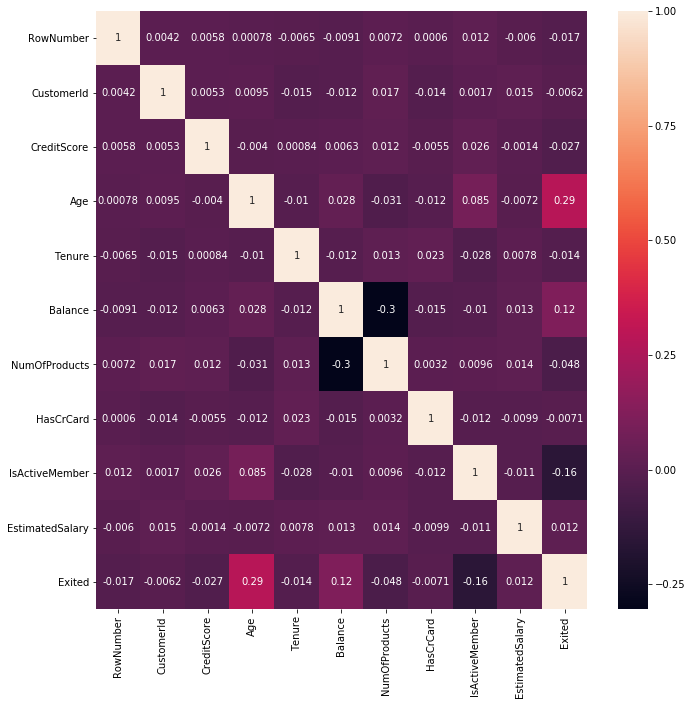

In [134]:

plt.figure(figsize=(11,11))

sns.heatmap(df[corr_feature].corr(),annot=True)
plt.ylim(11,0)

In [136]:
df6

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,1,1,0


In [138]:
df6.drop(['RowNumber','CustomerId','Surname'],inplace=True,axis=1)

In [140]:
df6.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.0,1,1,1,101348.88,1,0,0,0


In [142]:
x = df6.drop('Exited',axis=1)

In [144]:
x.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.0,1,1,1,101348.88,0,0,0


In [145]:
y = df6['Exited']

In [146]:
import xgboost

In [147]:
classifier = xgboost.XGBClassifier()

In [148]:

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [149]:
from sklearn.model_selection import RandomizedSearchCV

In [150]:
random_search = RandomizedSearchCV(estimator=classifier,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)

In [151]:
random_search.fit(x,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   11.3s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   11.5s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [152]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [153]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 3,
 'learning_rate': 0.15,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [154]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [155]:
from sklearn.model_selection import cross_val_score

In [156]:
score = cross_val_score(classifier,x,y,cv=10)

In [157]:
score

array([0.87 , 0.856, 0.876, 0.865, 0.864, 0.851, 0.868, 0.875, 0.861,
       0.857])

In [158]:
score.mean()

0.8642999999999998